# Case Study: Facial Expression Recognition

<img src="https://github.com/ijoseff/ijoseff.github.io/blob/master/assets/img/portfolio/recognition.png?raw=true" width = "800" height = "400"/>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study:-Facial-Expression-Recognition" data-toc-modified-id="Case-Study:-Facial-Expression-Recognition-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study: Facial Expression Recognition</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Review" data-toc-modified-id="Review-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Review</a></span></li><li><span><a href="#Libraries-And-Data-Importation" data-toc-modified-id="Libraries-And-Data-Importation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Libraries And Data Importation</a></span></li><li><span><a href="#Data-visualization" data-toc-modified-id="Data-visualization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data visualization</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

In this project, a deep learning model will be train based on Convolutional Neural Networks (CNNs) and Residual Blocks to detect facial expressions. This project could be practically used for detecting customer emotions and facial expressions. Facial Expression serves as a basis for social media face filtering application, customer responses to Ads and driver Monitoring Systems.

**Problem:**
 - Classify the different facial expression


**Dataset:**
 - The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).
 
**Source:**
 - This dataset was prepared by Pierre-Luc Carrier and Aaron Courville, as part of an ongoing research project. They have graciously provided the workshop organizers with a preliminary version of their dataset to use for this contest.

# Review

<img src="https://github.com/ijoseff/Facial-Expression-Classification/blob/master/expression.png?raw=true" width = "800" height = "400"/>

<img src="https://github.com/ijoseff/Facial-Expression-Classification/blob/master/expression2.png?raw=true" width = "800" height = "400"/>

<img src="https://github.com/ijoseff/Facial-Expression-Classification/blob/master/expression3.png?raw=true" width = "800" height = "400"/>

<img src="https://github.com/ijoseff/Facial-Expression-Classification/blob/master/expression4.png?raw=true" width = "800" height = "400"/>

# Libraries And Data Importation

In [1]:
# Import libraries
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pickle
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K

In [2]:
# Import data
emotion_df = pd.read_csv('emotion.csv')

In [3]:
# Check data
# Picture is represented by number based on pixel
emotion_df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...


In [4]:
# Check data
emotion_df['emotion'][2]

2

In [5]:
# Add space # String format
emotion_df['pixels'] = emotion_df[' pixels']

In [6]:
# Check data # String format
emotion_df['pixels'][2]

'24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 19 43 52 13 26 40 59 65 12 20 63 99 98 98 111 75 62 41 73 118 140 192 186 187 188 190 190 187 182 176 173 172 173 25 34 29 35 29 26 20 23 19 31 22 21 20 31 26 17 34 75 37 18 38 80 85 25 38 26 34 97 94 76 86 95 70 39 98 129 185 188 188 189 190 190 188 182 176 173 172 173 26 29 25 35 25 30 20 21 16 28 34 26 15 17 19 22 29 62 64 47 45 76 76 78 65 82 12 14 56 56 72 74 66 65 86 129 172 190 187 189 190 190 187 182 177 172 172 174 26 33 32 31 25 33 26 21 16 16 37 27 14 15 12 17 31 38 40 58 73 59 35 82 68 72 43 22 33 52 51 66 71 57 71 121 160 191 188 189 190 190 187 184 178 173 173 174 29 40 29 29 32 32 28 26 19 13 23 34 17 18 14 15 26 25 21 40 82 44 29 34 36 32 36 59 55 38 46 64 71 62 60 107 137 191 189 190 190 190 188 184 178 175 173 175 33 39 25 33 37 33 25 30 20 18 18 23 20 22 20 17 33 20 18 25 37 31 22 29 28 24 29 38 67 38 35 75 68 66 58 89 110 179 191 189 189 190 187 184 179 175 173 174 32 41 32 31 39 33 26 34 27 23 28 30 21 24 29 22 26 23 21

In [7]:
# Function to convert pixel values in string format to array format
def string2array(x):
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

In [8]:
# Apply the function
emotion_df['pixels'] = emotion_df['pixels'].apply(lambda x: string2array(x))

In [9]:
# Check shape
emotion_df['pixels'][2].shape

(48, 48, 1)

In [10]:
# Check data
emotion_df['pixels'][2];

In [11]:
# Checking for the presence of null values in the data frame
emotion_df.isnull().sum()

emotion    0
 pixels    0
pixels     0
dtype: int64

In [12]:
# Create label
label_to_text = {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}

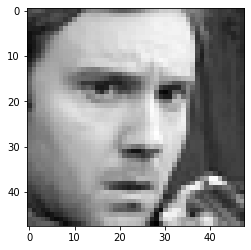

In [13]:
# Check image
plt.imshow(emotion_df['pixels'][0].squeeze(), cmap = 'gray')
plt.show()

# Data visualization

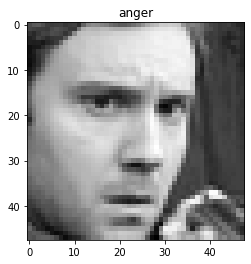

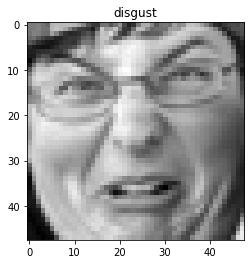

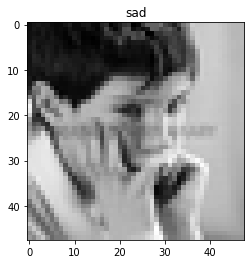

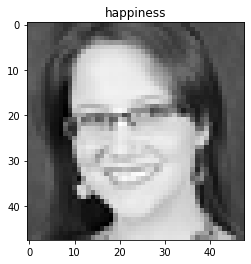

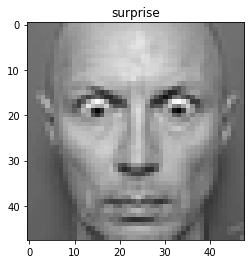

In [14]:
# Create List
emotions = [0,1,2,3,4]

# Create function
for i in emotions:
  data = emotion_df[emotion_df['emotion'] == i][:1]
  img = data['pixels'].item()
  img = img.reshape(48,48)
  plt.figure()
  plt.title(label_to_text[i])
  plt.imshow(img, cmap= 'gray')

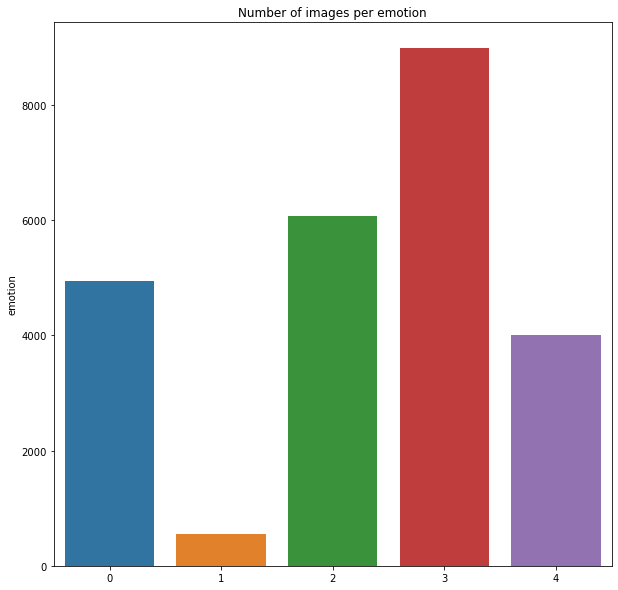

In [15]:
# Create barplot
plt.figure(figsize = (10, 10))
sns.barplot(x = emotion_df.emotion.value_counts().index, y = emotion_df['emotion'].value_counts())
plt.title("Number of images per emotion")
plt.show()

# Data Preprocessing

In [16]:
# Split the dataframe to features and labels
# From keras.utils import to_categorical
X = emotion_df['pixels']
X = np.stack(X, axis = 0)
X = X.reshape(24568, 48, 48, 1)

# y = to_categorical(emotion_df['emotion'])
y = pd.get_dummies(emotion_df['emotion'])

# Show data dimensions
print(X.shape, y.shape)

(24568, 48, 48, 1) (24568, 5)


In [17]:
# Transform data into arrays
X = np.array(X)
y = np.array(y)

In [18]:
# Import lirabries
from sklearn.model_selection import train_test_split

# spliting the dataframe in to train,test and validation data frames
X_train, X_Test, y_train, y_Test = train_test_split(X,y,test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test,y_Test, test_size = 0.5, shuffle = True)

In [19]:
# Check train dataset
print(X_train.shape, y_train.shape)

(22111, 48, 48, 1) (22111, 5)


In [20]:
# Check validation dataset
print(X_val.shape, y_val.shape)

(1228, 48, 48, 1) (1228, 5)


In [21]:
# Check test dataset
print(X_Test.shape, y_Test.shape)

(1229, 48, 48, 1) (1229, 5)


In [22]:
# Normalize images
X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

In [23]:
# Data augmentation
train_datagen = ImageDataGenerator(
rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    fill_mode = "nearest"
)

In [24]:
# Create funchtion
def res_block(X, filter, stage):

  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [25]:
# Input tensor shape
input_shape = (48, 48, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - stage
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((2, 2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

# Model architecture
model_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')

# Check model summary
model_emotion.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 54, 54, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 24, 24, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 24, 24, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [26]:
# Compile the network
model_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [27]:
# Using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# Save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath = "FacialExpression_weights.hdf5", verbose = 1, save_best_only=True)

In [28]:
# Train the model
history = model_emotion.fit(train_datagen.flow(X_train, y_train, batch_size = 64),
    validation_data = (X_val, y_val), steps_per_epoch = len(X_train) // 64,
    epochs= 10, callbacks = [checkpointer, earlystopping])

Epoch 1/10
345/345 [==============================] - ETA: 0s - loss: 1.4074 - accuracy: 0.4287
Epoch 00001: val_loss improved from inf to 1.83491, saving model to FacialExpression_weights.hdf5
345/345 [==============================] - 406s 1s/step - loss: 1.4074 - accuracy: 0.4287 - val_loss: 1.8349 - val_accuracy: 0.3746
Epoch 2/10
345/345 [==============================] - ETA: 0s - loss: 1.1733 - accuracy: 0.5310
Epoch 00002: val_loss improved from 1.83491 to 1.35695, saving model to FacialExpression_weights.hdf5
345/345 [==============================] - 433s 1s/step - loss: 1.1733 - accuracy: 0.5310 - val_loss: 1.3569 - val_accuracy: 0.4397
Epoch 3/10
345/345 [==============================] - ETA: 0s - loss: 1.0428 - accuracy: 0.5833
Epoch 00003: val_loss improved from 1.35695 to 1.30362, saving model to FacialExpression_weights.hdf5
345/345 [==============================] - 434s 1s/step - loss: 1.0428 - accuracy: 0.5833 - val_loss: 1.3036 - val_accuracy: 0.5049
Epoch 4/10
345

In [29]:
# Saving the model architecture to json file for future use
model_json = model_emotion.to_json()
with open("Emotion-model.json","w") as json_file:
  json_file.write(model_json)

# Model Evaluation

In [30]:
# Import model architecture
with open('Emotion-model.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# load the model architecture 
model_emotion = tf.keras.models.model_from_json(json_savedModel)
model_emotion.load_weights('FacialExpression_weights.hdf5')
model_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [31]:
# Check test accuracy
score = model_emotion.evaluate(X_Test, y_Test)
print('Test Accuracy: {}'.format(score[1]))

39/39 [==============================] - 3s 82ms/step - loss: 0.9336 - accuracy: 0.6485
Test Accuracy: 0.6484947204589844


In [32]:
# Check dictionary
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
# Check evaluation metrics
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

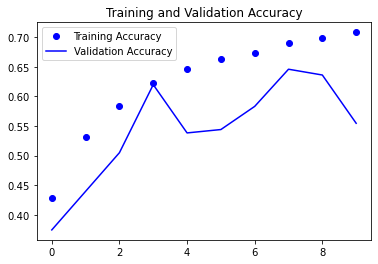

In [34]:
# Number of iterations
epochs = range(len(accuracy))

# Create plot for accuracy
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

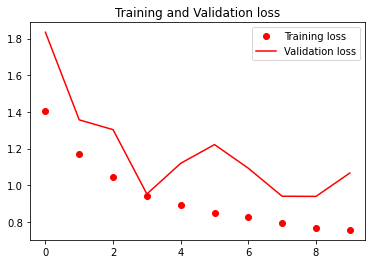

In [35]:
# Create plot for validation loss
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [36]:
# Predicted_classes = model.predict_classes(X_test)
predicted_classes = np.argmax(model_emotion.predict(X_Test), axis=-1)
y_true = np.argmax(y_Test, axis=-1)

In [37]:
# Check data dimension
y_true.shape

(1229,)

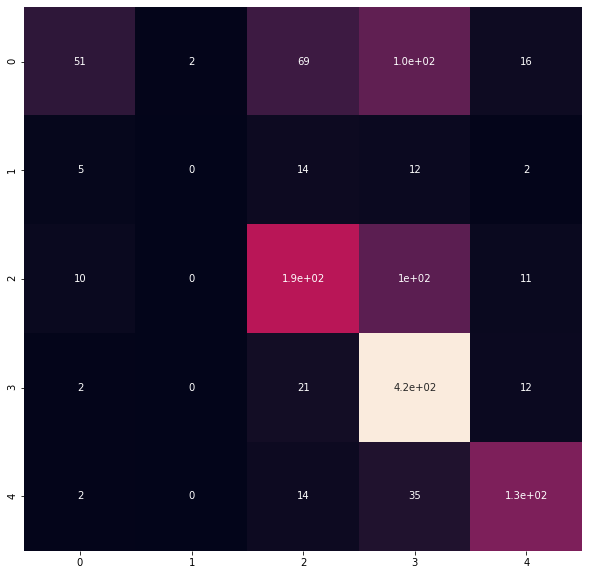

In [38]:
# import library
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)
plt.show()

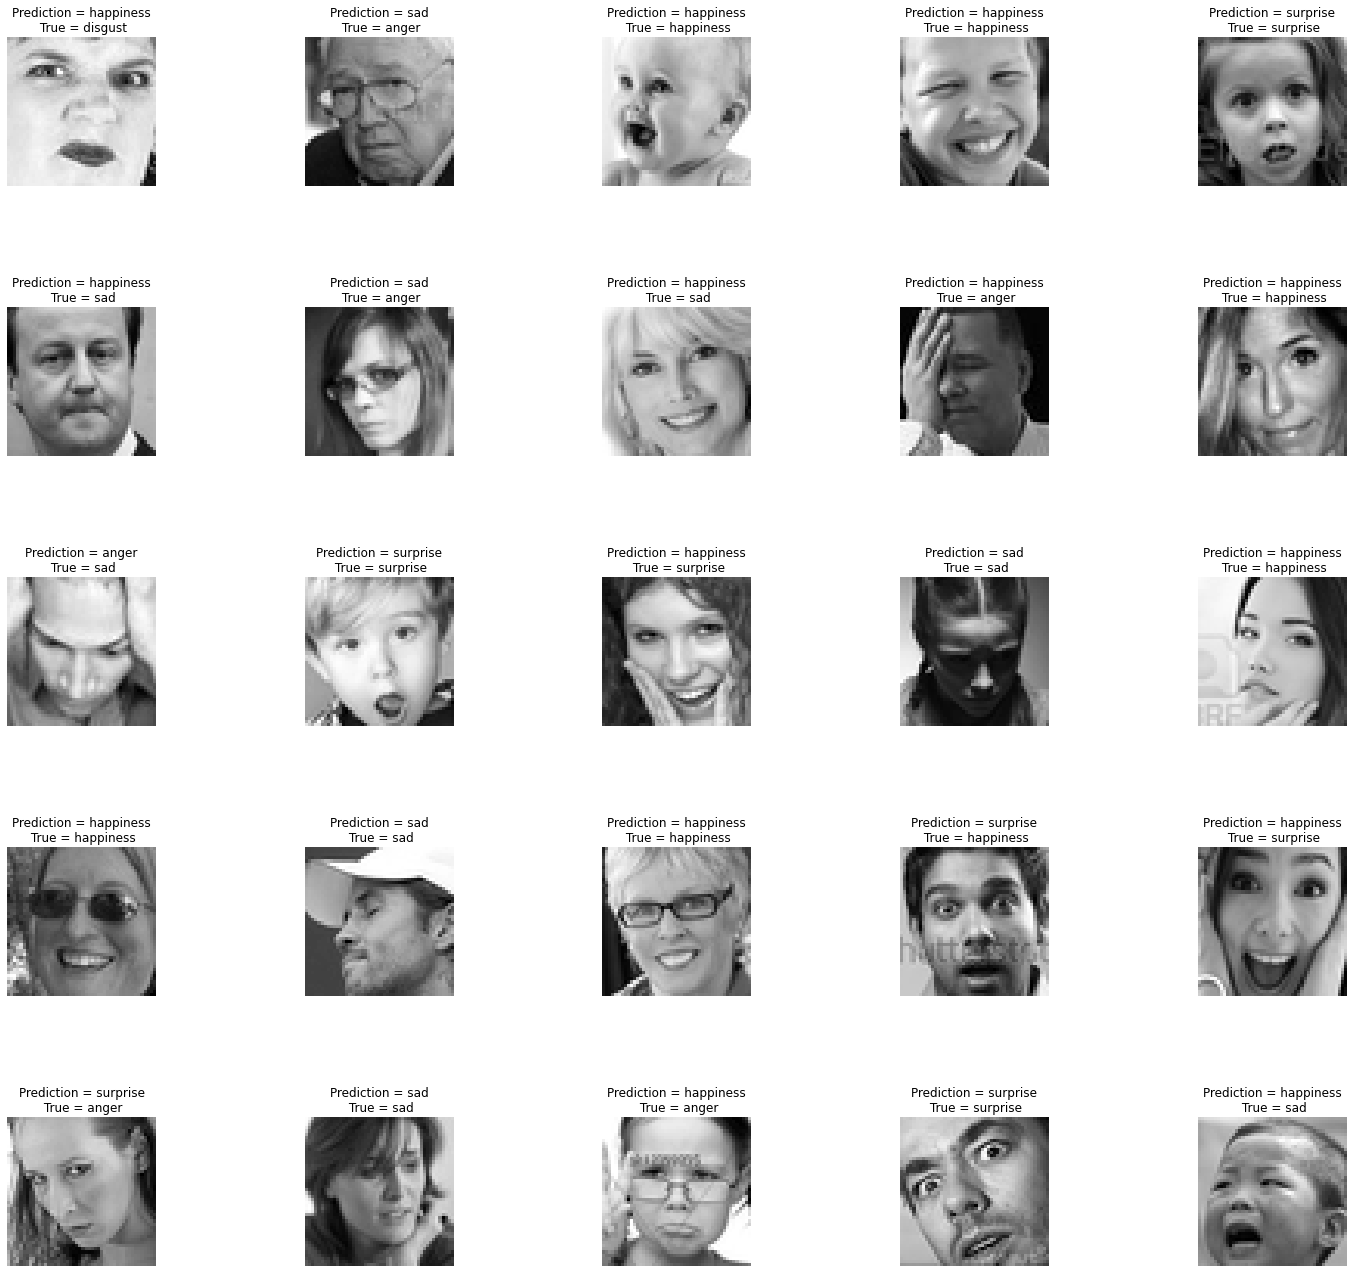

In [39]:
# Length
L = 5

# Width
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_Test[i].reshape(48,48), cmap = 'gray')
    axes[i].set_title('Prediction = {}\n True = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)
plt.show()

In [40]:
# Import lirabry
from sklearn.metrics import classification_report

# Check classification report
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.73      0.21      0.33       243
           1       0.00      0.00      0.00        33
           2       0.62      0.61      0.62       312
           3       0.63      0.92      0.75       456
           4       0.77      0.72      0.74       185

    accuracy                           0.65      1229
   macro avg       0.55      0.49      0.49      1229
weighted avg       0.65      0.65      0.61      1229



# Conclusion

It can be observed that the photos showing disgust has the lowest accuracy score it is because the data was imbalance. The solution to that is to add more examples by generating more augmented images or adjusting the weights of disgust photos. the model was able to obtained 65% accuracy with only 10 iterations. This could be further improve by tuning the model hyper parameters and increasing the iterations.